In [1]:
import os
import sys
import librosa
import librosa.display

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("../../")

from helpers.split import label_strings, tag_label_feature_split

In [2]:
file = os.path.join(Path().absolute().parents[1], 'datasets', 'melspectrogram_base_genres_100.pickle.bz2')
df = pd.read_pickle(file)

In [3]:
df.head()

,metadata_path,melspectrogram,genre_label
0,79/1107579.mp3,"[[-90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -9...",genre_blues
0,00/1289300.mp3,"[[-78.266624, -62.70582, -39.31391, -28.755621...",genre_blues
0,76/1310776.mp3,"[[-25.845741, -9.64709, -8.605388, -15.772289,...",genre_blues
0,01/1403901.mp3,"[[-90.0, -90.0, -90.0, -90.0, -90.0, -90.0, -9...",genre_blues
0,57/499057.mp3,"[[-90.0, -90.0, -68.24053, -26.205925, -29.883...",genre_blues


In [15]:
melspec_sample = np.array(df.iloc[1]['melspectrogram'])
print(melspec_sample.shape)
print(melspec_sample)

(96, 9074)
[[-78.266624 -62.70582  -39.31391  ... -48.44301  -44.32779  -47.096565]
 [-80.69307  -53.007862 -34.409492 ... -38.40588  -37.754704 -49.60678 ]
 [-88.38767  -47.507545 -33.172497 ... -26.455221 -28.604761 -49.42348 ]
 ...
 [-90.       -90.       -90.       ... -87.17012  -82.70938  -86.94498 ]
 [-90.       -90.       -90.       ... -90.       -85.920006 -88.261055]
 [-90.       -90.       -90.       ... -90.       -87.3441   -88.96681 ]]


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

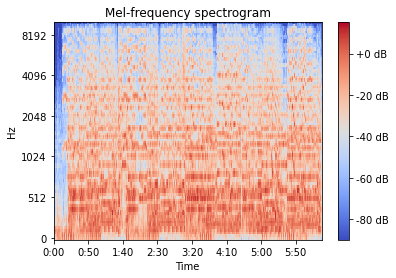

In [16]:
fig, ax = plt.subplots()
img = librosa.display.specshow(melspec_sample, x_axis='time',
                         y_axis='mel', sr=12000,
                         fmax=10000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

To create center cropped melspec for 29.1 sec

In [17]:
def crop_center(melspec,cropx,cropy):
    y,x = melspec.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return melspec[starty:starty+cropy,startx:startx+cropx]

In [18]:
melspec_sample_cropped = crop_center(melspec_sample, 683, 96)
print(melspec_sample_cropped.shape)

(96, 683)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

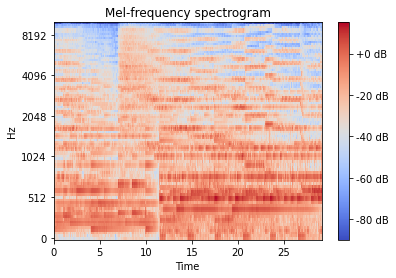

In [19]:
fig, ax = plt.subplots()
img = librosa.display.specshow(melspec_sample_cropped, x_axis='time',
                         y_axis='mel', sr=12000,
                         fmax=10000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

The spectrum from melspectorgram

In [20]:
signal = librosa.db_to_amplitude(melspec_sample)
signal

array([[1.2208680e-04, 7.3233392e-04, 1.0821922e-02, ..., 3.7831157e-03,
        6.0758996e-03, 4.4174497e-03],
       [9.2330745e-05, 2.2366950e-03, 1.9033795e-02, ..., 1.2014507e-02,
        1.2949850e-02, 3.3087272e-03],
       [3.8072943e-05, 4.2133019e-03, 2.1946996e-02, ..., 4.7559682e-02,
        3.7133157e-02, 3.3792942e-03],
       ...,
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 4.3801985e-05,
        7.3203366e-05, 4.4952201e-05],
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        5.0582410e-05, 3.8631981e-05],
       [3.1622778e-05, 3.1622778e-05, 3.1622778e-05, ..., 3.1622778e-05,
        4.2933356e-05, 3.5617144e-05]], dtype=float32)

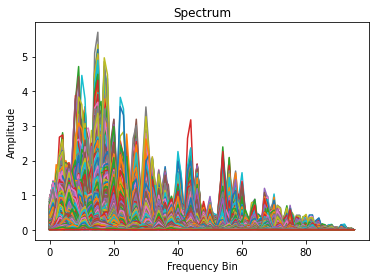

In [21]:
plt.plot(signal)
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

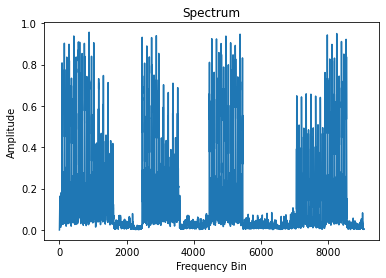

In [22]:
plt.plot(signal[0])
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

transform melspectorgram back to signal 
- note: this is only an approximate linear magnitude spectrogram

In [23]:
S = librosa.feature.inverse.mel_to_stft(melspec_sample, sr = 12000)
y = librosa.griffinlim(S)

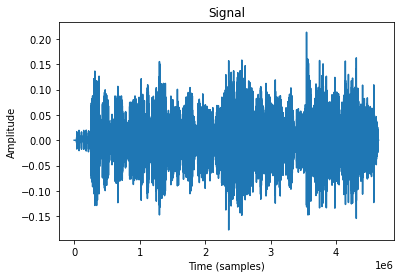

In [24]:
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');